#### tries tp tranform data from any distro to Gaussian distro

In [1]:
#11th notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
analyst_data = pd.read_csv("./Datasets/Analyst_Forecasts.csv")
analyst_data.head()

# values for each row from col q1 - q8 shows how much analyst predictions for a qaurter deviated from actual result
# votes is popularity of analyst

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [3]:
X = analyst_data[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8"]]

y = analyst_data[["Votes"]]

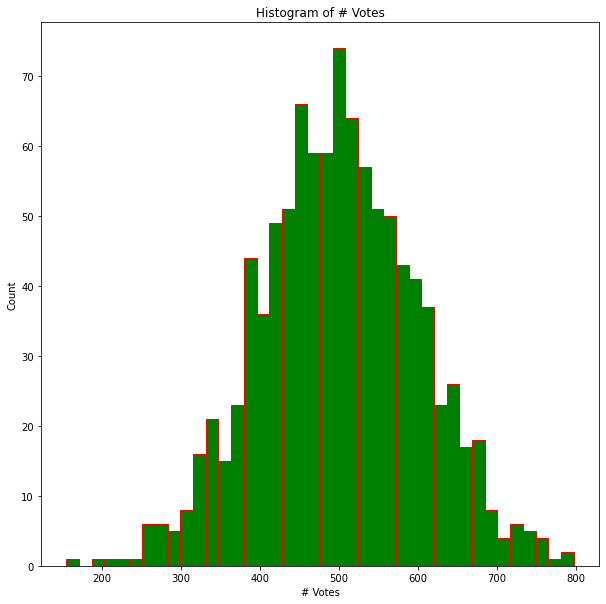

In [6]:
# viz data
plt.figure(figsize = (10, 10))

plt.hist(analyst_data["Votes"], facecolor = "green", edgecolor = "red", bins = 40)

plt.xlabel("# Votes")
plt.ylabel("Count")

plt.title("Histogram of # Votes")
plt.show();

In [8]:
# gets the variance of each row in dataset of each analyst forecast and save in the main df
analyst_data["Variability"] = analyst_data[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8"]].var(axis = 1)

analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


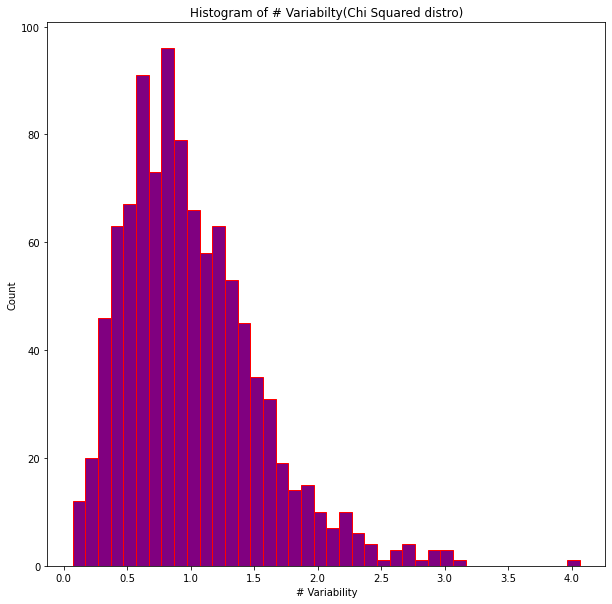

In [9]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(analyst_data["Variability"], facecolor = "purple", edgecolor = "red", bins = 40)

plt.xlabel("# Variability")
plt.ylabel("Count")

plt.title("Histogram of # Variabilty(Chi Squared distro)")
plt.show();

In [11]:
# fit model to get num of votes/popularity of each analyst
linear_regression = LinearRegression().fit(X, y)
linear_regression.score(X, y)

0.008116291372005646

In [13]:
# compare predictions of poor model to actual values
y_predict = linear_regression.predict(X)

results_df = pd.DataFrame({"y_actual": y["Votes"],
                          "y_predicted": y_predict.reshape(1, -1)[0]})

results_df.head()

,y_actual,y_predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


**Using Power Transformer to improve our model**

In [14]:
# store variablity of analyst pred in another df
x_chi_sq = analyst_data[["Variability"]]
x_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


In [15]:
# power transforms variablity(chi-squared distro) to normal distro
# using box cox, data must be all +ve.. if data has -ve values use ; "yeo-johnson"
power_transformer = PowerTransformer(method = "box-cox")

x_transformed = power_transformer.fit(x_chi_sq).transform(x_chi_sq)

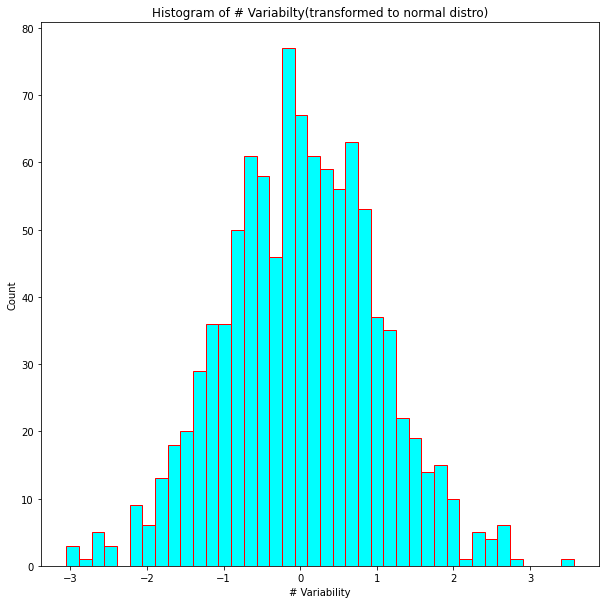

In [16]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(x_transformed, facecolor = "cyan", edgecolor = "red", bins = 40)

plt.xlabel("# Variability")
plt.ylabel("Count")

plt.title("Histogram of # Variabilty(transformed to normal distro)")
plt.show();

In [17]:
# used the transormed variability to predict vote
linear_regression = LinearRegression().fit(x_transformed, y)

linear_regression.score(x_transformed, y)

0.8620498861541088